@Author: Bhupinder Singh

@Date: 24-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 27-01-2023

@Title: The data given in the url is related with direct marketing campaigns of a banking
        institution. The marketing campaigns were based on phone calls. Often, more
        than one contact to the same client was required, in order to access if the product
        (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to
        predict whether client will subscribe to term deposit

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import seaborn as sns
import math
import operator
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import auc
from sklearn import preprocessing

### Import the dataset 

In [107]:
data = pd.read_csv('bank.csv', sep=';')

### Getting Insights of dataset

In [108]:
data.head(5)

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [109]:
data.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Checking for Null values in data set

In [111]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking for Outliers in data set

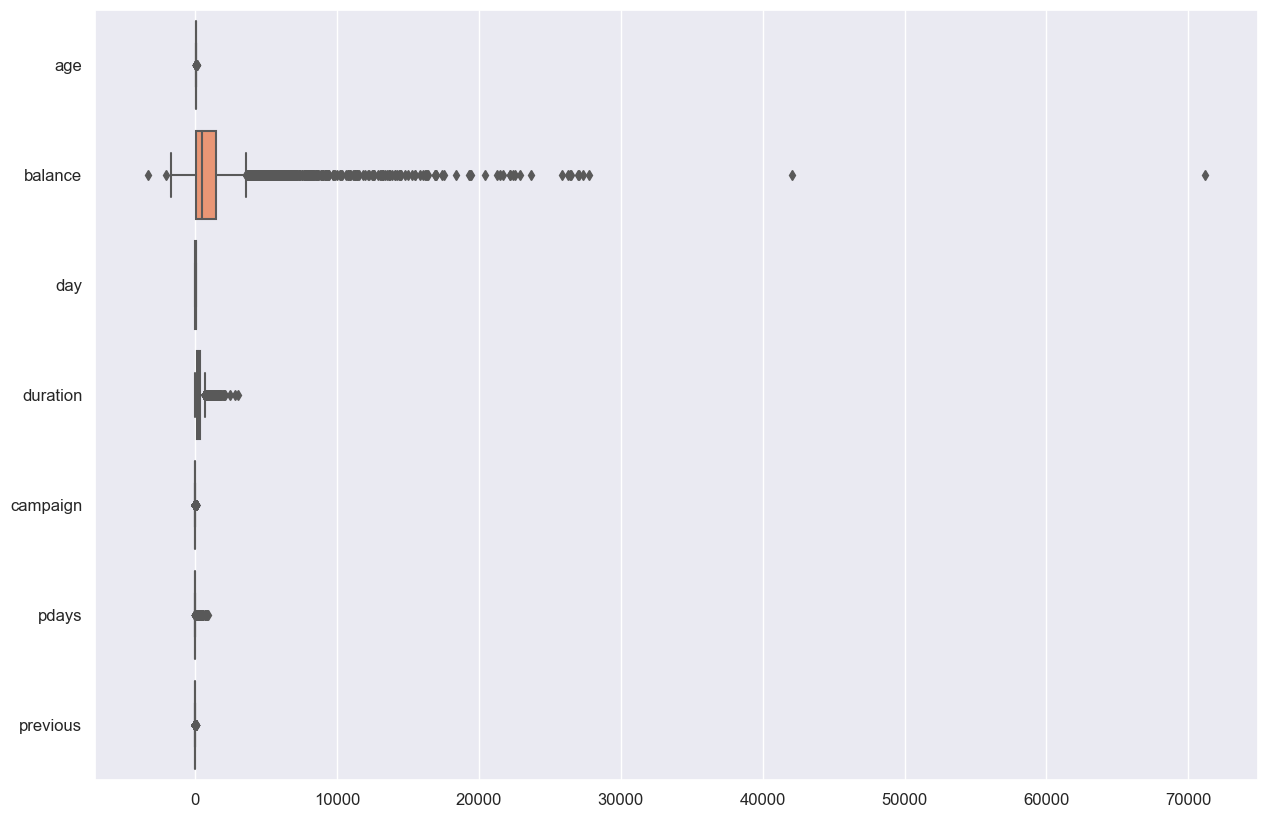

In [112]:
#create the plot
ax = sns.boxplot(data = data[['age','balance','day','duration','campaign','pdays','previous']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Removing Outliers

In [113]:
def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.5,0.80]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

data=cap_data(data)

capping the  age
capping the  job
capping the  marital
capping the  education
capping the  default
capping the  balance
capping the  housing
capping the  loan
capping the  contact
capping the  day
capping the  month
capping the  duration
capping the  campaign
capping the  pdays
capping the  previous
capping the  poutcome
capping the  y


C:\Users\Asus\AppData\Local\Temp\ipykernel_19880\828903004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_19880\828903004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]


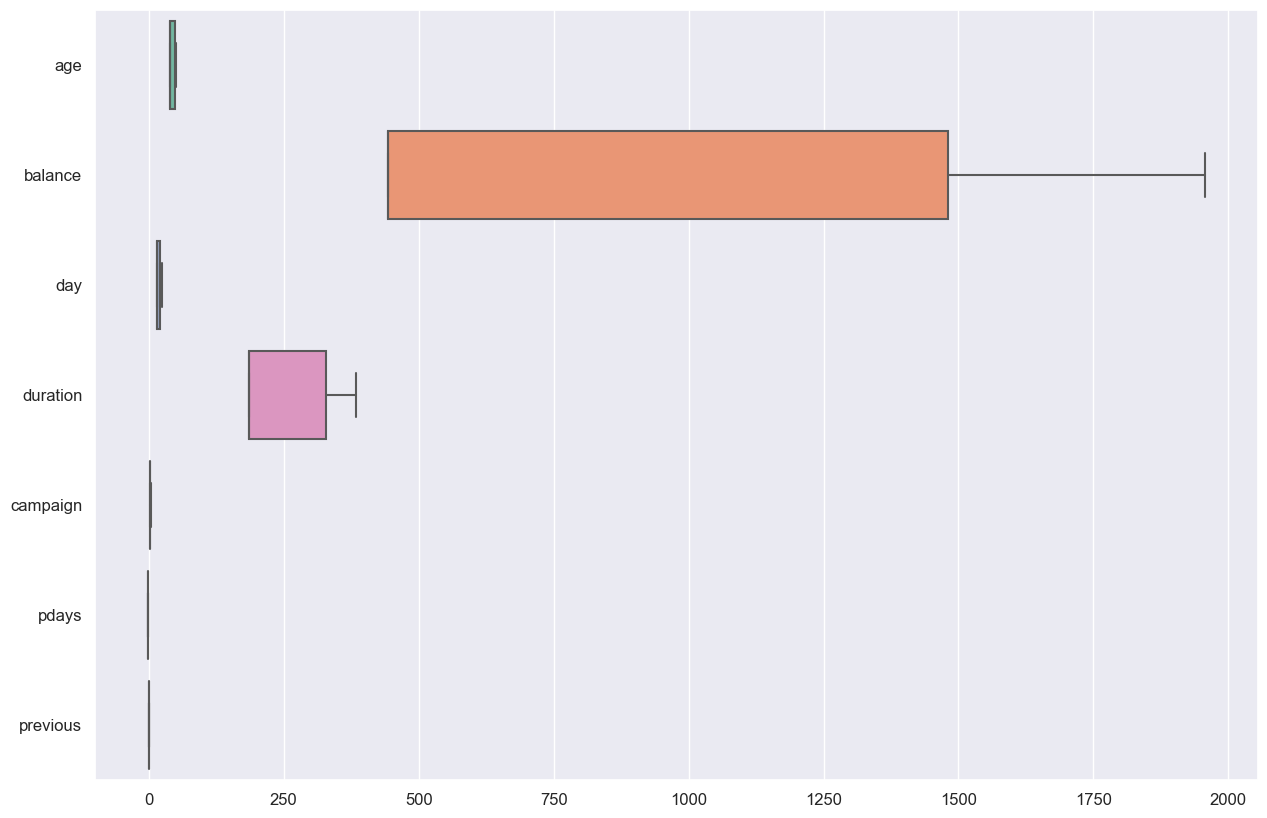

In [114]:
#create the plot
ax = sns.boxplot(data = data[['age','balance','day','duration','campaign','pdays','previous']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

Data encoding

In [115]:
data.head(5)

age          job  marital  education default  balance housing loan  \
0   39   unemployed  married    primary      no     1787      no   no   
1   39     services  married  secondary      no     1957     yes  yes   
2   39   management   single   tertiary      no     1350     yes   no   
3   39   management  married   tertiary      no     1476     yes  yes   
4   51  blue-collar  married  secondary      no      444     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct       185         2     -1         0  unknown  no  
1  cellular   16   may       220         2     -1         0  failure  no  
2  cellular   16   apr       185         2     -1         0  failure  no  
3   unknown   16   jun       199         4     -1         0  unknown  no  
4   unknown   16   may       226         2     -1         0  unknown  no

In [116]:
#data = data.drop(['contact','day','month','poutcome'], axis=1)

In [117]:
data.head(5)

age          job  marital  education default  balance housing loan  \
0   39   unemployed  married    primary      no     1787      no   no   
1   39     services  married  secondary      no     1957     yes  yes   
2   39   management   single   tertiary      no     1350     yes   no   
3   39   management  married   tertiary      no     1476     yes  yes   
4   51  blue-collar  married  secondary      no      444     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct       185         2     -1         0  unknown  no  
1  cellular   16   may       220         2     -1         0  failure  no  
2  cellular   16   apr       185         2     -1         0  failure  no  
3   unknown   16   jun       199         4     -1         0  unknown  no  
4   unknown   16   may       226         2     -1         0  unknown  no

In [118]:
data[ 'job' ] = data[ 'job' ].astype( 'category' )  
data[ 'education' ] = data[ 'education' ].astype( 'category' ) 
data[ 'poutcome' ] = data[ 'poutcome' ].astype( 'category' ) 
data['month'] = data['month'].astype( 'category' ) 
data['marital'] = data['marital'].astype( 'category' ) 
data['contact'] = data['contact'].astype( 'category' ) 


data['job'] = data['job'].cat.codes
data['education'] = data['education'].cat.codes
data['poutcome'] = data['poutcome'].cat.codes
data['month'] = data['month'].cat.codes
data['marital'] = data['marital'].cat.codes
data['contact'] = data['contact'].cat.codes

binary encoding

In [119]:
def binary_encode(data_frame,col_name):
    """
    Description:
        Function to binary encode the categorical columns in data frame 
    Parameter:
        data_frame: Imported dataframe
        col_name: column name that need to be encoded
    Return:
            Returns encoded_list
    """
    encoded_list = []
    for i in data_frame[col_name]:
        if ((i == 'Yes') | (i== 'yes')):
            encoded_value = 1
        else:
            encoded_value = 0
        encoded_list.append(encoded_value)
    return encoded_list

In [120]:
row,col=data.shape
default_list = binary_encode(data,'default')
data.drop(['default'],axis=1,inplace=True)
data.insert(loc=2, column="default", value=default_list)

loan_list = binary_encode(data,'loan')
data.drop(['loan'],axis=1,inplace=True)
data.insert(loc=2, column="loan", value=loan_list)

housing_list = binary_encode(data,'housing')
data.drop(['housing'],axis=1,inplace=True)
data.insert(loc=2, column="housing", value=housing_list)

y_list = binary_encode(data,'y')
data.drop(['y'],axis=1,inplace=True)
data.insert(loc=col-1, column="y", value=y_list)

In [121]:
data.head(5)

age  job  housing  loan  default  marital  education  balance  contact  \
0   39   10        0     0        0        1          0     1787        0   
1   39    7        1     1        0        1          1     1957        0   
2   39    4        1     0        0        2          2     1350        0   
3   39    4        1     1        0        1          2     1476        2   
4   51    1        1     0        0        1          1      444        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10       185         2     -1         0         3  0  
1   16      8       220         2     -1         0         0  0  
2   16      0       185         2     -1         0         0  0  
3   16      6       199         4     -1         0         3  0  
4   16      8       226         2     -1         0         3  0

### Feature Scaling

In [122]:
df = data[list(data.columns[:-1])]
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df)
df = pd.DataFrame(standard_df)
df['y'] = data['y']
data=df

In [123]:
data.columns =['age','job',	'housing','loan','default','marital','education','balance','contact','day','month','duration','campaign','pdays','previous','poutcome','y']

###  Split the dataset into training set and test set

In [124]:
# Select ratio
ratio = 0.80
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
train_data = data[0:train_size]
test_data = data[train_size:]


# print train set
print("Train dataframe")
display(train_data)
  
# print test set
print("Test dataframe")
display(test_data)

train_data.shape, test_data.shape

Train dataframe


age       job   housing      loan   default   marital  education  \
0    -0.821381  1.716804 -1.142051 -0.424756 -0.130759 -0.246429  -1.644755   
1    -0.821381  0.795246  0.875617  2.354292 -0.130759 -0.246429  -0.309038   
2    -0.821381 -0.126313  0.875617 -0.424756 -0.130759  1.421396   1.026680   
3    -0.821381 -0.126313  0.875617  2.354292 -0.130759 -0.246429   1.026680   
4     1.578272 -1.047871  0.875617 -0.424756 -0.130759 -0.246429  -0.309038   
...        ...       ...       ...       ...       ...       ...        ...   
3611 -0.821381  1.409618  0.875617 -0.424756 -0.130759  1.421396  -0.309038   
3612  1.378301 -0.126313 -1.142051 -0.424756 -0.130759 -1.914255   1.026680   
3613  1.178330  1.409618 -1.142051 -0.424756 -0.130759 -0.246429  -0.309038   
3614  1.578272  0.180874 -1.142051 -0.424756 -0.130759 -1.914255   1.026680   
3615 -0.821381 -1.355057 -1.142051 -0.424756 -0.130759  1.421396  -0.309038   

       balance   contact       day     month  duration  campaign  pdays  \
0     1.416776 -0.723642  0.115042  1.485414 -0.775794 -0.670145    0.0   
1     1.691978 -0.723642 -0.806589  0.819288 -0.344756 -0.670145    0.0   
2     0.709343 -0.723642 -0.806589 -1.845220 -0.775794 -0.670145    0.0   
3     0.913317  1.495133 -0.806589  0.153161 -0.603379  1.765325    0.0   
4    -0.757325  1.495133 -0.806589  0.819288 -0.270864 -0.670145    0.0   
...        ...       ...       ...       ...       ...       ...    ...   
3611 -0.757325 -0.723642 -0.806589  0.819288 -0.775794  1.765325    0.0   
3612 -0.757325 -0.723642 -0.806589  0.819288 -0.615694 -0.670145    0.0   
3613  1.691978  1.495133  0.115042  0.819288 -0.775794 -0.670145    0.0   
3614 -0.757325 -0.723642 -0.806589 -1.512157  1.662646 -0.670145    0.0   
3615 -0.250628 -0.723642 -0.806589 -0.846030  1.170032 -0.670145    0.0   

      previous  poutcome  y  
0          0.0  0.444413  0  
1          0.0 -2.579961  0  
2          0.0 -2.579961  0  
3          0.0  0.444413  0  
4          0.0  0.444413  0  
...        ...       ... ..  
3611       0.0  0.444413  0  
3612       0.0 -1.571836  0  
3613       0.0  0.444413  0  
3614       0.0  0.444413  0  
3615       0.0  0.444413  0  

[3616 rows x 17 columns]

Test dataframe


age       job   housing      loan   default   marital  education  \
3616  0.378445 -0.126313 -1.142051 -0.424756 -0.130759  1.421396   1.026680   
3617 -0.221468 -1.047871 -1.142051 -0.424756 -0.130759 -0.246429  -0.309038   
3618  0.378445 -1.355057 -1.142051 -0.424756 -0.130759 -0.246429  -0.309038   
3619  0.778388  1.409618  0.875617 -0.424756 -0.130759 -0.246429  -1.644755   
3620  1.578272  0.180874 -1.142051  2.354292 -0.130759 -1.914255  -0.309038   
...        ...       ...       ...       ...       ...       ...        ...   
4516 -0.821381  0.795246  0.875617 -0.424756 -0.130759 -0.246429  -0.309038   
4517  1.578272  0.488060  0.875617  2.354292  7.647669 -0.246429   1.026680   
4518  1.578272  1.409618 -1.142051 -0.424756 -0.130759 -0.246429  -0.309038   
4519 -0.821381 -1.047871 -1.142051 -0.424756 -0.130759 -0.246429  -0.309038   
4520  0.178474 -0.740685  0.875617  2.354292 -0.130759  1.421396   1.026680   

       balance   contact       day     month  duration  campaign  pdays  \
3616 -0.757325 -0.723642  1.651094 -0.179903 -0.775794 -0.670145    0.0   
3617 -0.757325 -0.723642 -0.806589 -0.179903 -0.775794 -0.670145    0.0   
3618 -0.757325 -0.723642 -0.806589 -0.179903 -0.443279 -0.670145    0.0   
3619 -0.757325  1.495133 -0.806589  0.819288 -0.775794  1.765325    0.0   
3620 -0.508024 -0.723642 -0.806589 -0.179903 -0.775794 -0.670145    0.0   
...        ...       ...       ...       ...       ...       ...    ...   
4516 -0.757325 -0.723642  1.651094 -0.179903  0.997617  1.765325    0.0   
4517 -0.757325  1.495133 -0.806589  0.819288 -0.775794 -0.670145    0.0   
4518 -0.757325 -0.723642  0.115042 -1.512157 -0.775794  1.765325    0.0   
4519  0.364531 -0.723642 -0.806589 -0.846030 -0.775794  1.765325    0.0   
4520  0.362912 -0.723642 -0.806589 -1.845220  1.194663 -0.670145    0.0   

      previous  poutcome  y  
3616       0.0  0.444413  0  
3617       0.0  0.444413  0  
3618       0.0  0.444413  0  
3619       0.0  0.444413  0  
3620       0.0  0.444413  0  
...        ...       ... ..  
4516       0.0  0.444413  0  
4517       0.0  0.444413  0  
4518       0.0  0.444413  0  
4519       0.0 -1.571836  0  
4520       0.0 -1.571836  0  

[905 rows x 17 columns]

((3616, 17), (905, 17))

### Extracting the values of features

In [125]:
rows,col=train_data.shape
data_n=train_data.values
m=len(data_n[:,-1])
print(m)
x_train=data_n[:,0:col-1].reshape(m,col-1)
x_train = np.append(np.ones((m,1)),x_train,axis=1)
y_train=data_n[:,-1].reshape(m,1)
#theta=np.zeros((col,1))

3616


In [126]:
y_train.shape

(3616, 1)

In [127]:
x_train.shape

(3616, 17)

In [128]:
def sigmoid(z):
    
    return 1/ (1 + np.exp(-z))

In [129]:
x_train.shape

(3616, 17)

In [130]:
def forward_propagation(x_train,weights):
        output = sigmoid(np.dot(x_train, weights))
        return output

In [131]:
def backward_propagation(X,y,weights,alpha,num_iters):
    """
    Description:
            update theta by taking num_iters gradient steps with learning rate of alpha
    Parameter:
        X: x values from train dataset
        y: y values from train dataset
        theta: initial theta values 
        alpha: learning rate
        num_iters: Number of epochs
    Return:
            Returns the computed theta and cost function value
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        y_pred= forward_propagation(x_train,weights)
        weights = weights - (alpha * 1/m * np.dot(X.transpose(),(y_pred - y)))
        print(f"For Epoch {i} Theta :{weights} ")
    
    return weights 

In [132]:
input_size= 17
output_size=1
weights = np.random.randn(input_size, output_size) 
epochs=12000
learning_rate=0.01
weights =backward_propagation(x_train, y_train,weights,learning_rate,epochs)

For Epoch 0 Theta :[[-0.07034975]
 [ 0.61988768]
 [-1.63479202]
 [ 0.34360294]
 [ 0.96546037]
 [-0.65554757]
 [-0.1852862 ]
 [-0.86655393]
 [ 0.94399395]
 [ 1.419747  ]
 [ 0.8427848 ]
 [-0.20214536]
 [ 1.04112943]
 [ 0.24667411]
 [ 1.02674409]
 [ 0.25869828]
 [ 0.38490064]] 
For Epoch 1 Theta :[[-0.07408962]
 [ 0.61906206]
 [-1.6326063 ]
 [ 0.34262235]
 [ 0.96411062]
 [-0.65503928]
 [-0.18444234]
 [-0.8648897 ]
 [ 0.943406  ]
 [ 1.41748464]
 [ 0.84199377]
 [-0.20292722]
 [ 1.04133179]
 [ 0.24615972]
 [ 1.02674409]
 [ 0.25869828]
 [ 0.38369879]] 
For Epoch 2 Theta :[[-0.07782576]
 [ 0.61823703]
 [-1.63042145]
 [ 0.34164281]
 [ 0.96276124]
 [-0.65453114]
 [-0.18359964]
 [-0.86322646]
 [ 0.9428174 ]
 [ 1.41522384]
 [ 0.84120255]
 [-0.20370765]
 [ 1.04153263]
 [ 0.24564566]
 [ 1.02674409]
 [ 0.25869828]
 [ 0.38249802]] 
For Epoch 3 Theta :[[-0.08155817]
 [ 0.61741258]
 [-1.62823747]
 [ 0.34066433]
 [ 0.96141225]
 [-0.65402315]
 [-0.18275811]
 [-0.86156421]
 [ 0.94222815]
 [ 1.4129646 ]
 [ 

### Accuracy

In [133]:
rows,col=test_data.shape
data_x=test_data.values
m2=len(data_x[:,-1])
x_test=data_x[:,0:col-1].reshape(m2,col-1)
x_test = np.append(np.ones((m2,1)),x_test,axis=1)
y_test=data_x[:,-1].reshape(m2,1)

In [134]:
y_pred = sigmoid(np.dot(x_test,weights))
print(y_test.shape)
print(y_pred.shape)

(905, 1)
(905, 1)


In [135]:
for i in range(0,len(y_pred)):
    if(y_pred[i]>0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0
#print(y_pred) 

In [136]:
def EvaluateTest(y_test, y_pred):
    n_correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_test)
    return acc

In [137]:
EvaluateTest(y_test, y_pred)

0.8707182320441988